# CAPSTONE PROJECT

## ANALYZING GRAMINEOUS ALLERGY ON MÁLAGA (SPAIN)

##### Málaga is a city located to south of Spain with more than 570000 residents. It's one of the most important cities of Spain because It has a significant place for I+D+i or multiple transport methods and all of this is linked by a prestigious University, with many students from other countries.

![malaga](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmedia.web.britannica.com%2Feb-media%2F41%2F64541-004-8D0B3EC6.gif&f=1&nofb=1)

##### Climatic change has increased the levels from multiples allergies, like pollen. Experts think that in Spain there will be 12 millions of pollen allergic individuals on 2030. As we see in the following image, Málaga is one of the most affected cities.

![provincias_afectadas](https://cdns3.eltiempo.es/eltiempo/blog/noticias/2019/05/08235735/polen-espana-primavera.jpg)

##### Pollen allergies can come from different types of plants or trees. For example It has eight main ways:

- Ortigas
- Gramínea
- Olivo
- Ciprés
- Abedul
- Robles/Encinas
- Plantago
- Chenopodiaceae-Amaranthaceae

We're going to study Gramínea (gramineous case) because It's most popular in Spain, as we see in the next image.

### Comparaing gramineous allergy with others

![case1](https://www.uco.es/rea/inf_polen/mapas-incidencia/dist_ortigas-grami.jpg)
![case2](https://www.uco.es/rea/inf_polen/mapas-incidencia/dist_olivo-cipres.jpg)
![case3](https://www.uco.es/rea/inf_polen/mapas-incidencia/dist_abedul-roble.jpg)
![case4](https://www.uco.es/rea/inf_polen/mapas-incidencia/dist_plantago-cheno.jpg)

##### Robles/Encinas also is produced in whole of Spain but we choose gramineous because It affects on 7 of 8 millions of allergic individuals from Spain.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import requests
import folium
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Getting Málaga DataFrame

In [2]:
url = 'https://es.wikipedia.org/wiki/Distritos_de_M%C3%A1laga'
response = requests.get(url)

In [3]:
#Convert url to dataframe
df = pd.read_html(response.content)[0]

### Cleaning DataFrame

In [4]:
#We don't need 'Nº' column, and we will introduce 'Barrio' data manually
df.drop('Nº', axis=1, inplace=True)
df.drop('Barrios', axis=1, inplace=True)

#Let's change columns names
df.columns = ['Distritos']

#Removing the unnecesary numbers
df.Distritos = df.Distritos.str.replace('\d+', '.')
df['Distritos'] = df['Distritos'].map(lambda x: x.rstrip('.'))

In [5]:
#Add how many residents there is for each District
df['Población'] = [82193, 57364, 36662, 60604, 30727, 86520, 115391, 19393, 18380, 29581, 35452]

In [6]:
#Let's introduce latitude and longitude datas manually
df['Latitud'] = [36.72425, 36.72098, 36.74922, 36.72170, 36.73929, 36.71394, 36.70245, 36.66522, 36.73131, 36.73693, 36.72316]
df['Longitud'] = [-4.41752, -4.35606, -4.41745, -4.43861, -4.42799, -4.44333,  -4.43770, -4.49027, -4.55031, -4.48159, -4.468537]

In [7]:
df

,Distritos,Población,Latitud,Longitud
0,Centro,82193,36.72425,-4.417520
1,Este,57364,36.72098,-4.356060
2,Ciudad Jardín,36662,36.74922,-4.417450
3,Bailén-Miraflores,60604,36.72170,-4.438610
4,Palma-Palmilla,30727,36.73929,-4.427990
5,Cruz de Humilladero,86520,36.71394,-4.443330
6,Carretera de Cádiz,115391,36.70245,-4.437700
7,Churriana,19393,36.66522,-4.490270
8,Campanillas,18380,36.73131,-4.550310
9,Puerto de la Torre,29581,36.73693,-4.481590


### Let's visualize Málaga's Map

In [8]:
latitude=36.716667
longitude=-4.416667

map_malaga = folium.Map(location=[latitude, longitude], zoom_start=12)

#Adding markers to map
for lat, lng, label in zip(df['Latitud'], df['Longitud'], df['Distritos']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_malaga)  

latitudes = list(df.Latitud)
longitudes = list(df.Longitud)
labels = list(df.Distritos)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_malaga)      
    
map_malaga

![title](https://i.imgur.com/0x4lrdQ.png)

### Let's insert our final dataframe

In [9]:
#https://datosabiertos.malaga.eu/recursos/ambiente/polen/2019.csv
url='2019.csv'
malaga_data = pd.read_csv(url, parse_dates=['FECHA'], dayfirst=True).set_index('FECHA')

In [10]:
malaga_data.columns

Index(['Cupressaceae valor', 'Cupressaceae riesgo', 'Cupressaceae previsión',
       'Cupressaceae tendencia', 'Platanus valor', 'Platanus riesgo',
       'Platanus previsión', 'Platanus tendencia', 'Urticaceae valor',
       'Urticaceae riesgo', 'Urticaceae previsión', 'Urticaceae tendencia',
       'Quercus valor', 'Quercus riesgo', 'Quercus previsión',
       'Quercus tendencia', 'Olea valor', 'Olea riesgo', 'Olea previsión',
       'Olea tendencia', 'Gramíneas valor', 'Gramíneas riesgo',
       'Gramíneas previsión', 'Gramíneas tendencia', 'Plantago valor',
       'Plantago riesgo', 'Plantago previsión', 'Plantago tendencia',
       'Chenopodiaceae valor', 'Chenopodiaceae riesgo',
       'Chenopodiaceae previsión', 'Chenopodiaceae tendencia',
       'Casuarina valor', 'Casuarina riesgo', 'Casuarina previsión',
       'Casuarina tendencia', 'LAT', 'LON'],
      dtype='object')

In [11]:
#It has many columns, so let's remove all those that we don't need
malaga_data.drop(malaga_data.columns[0:20], axis=1, inplace=True)
malaga_data.drop(malaga_data.columns[4:16], axis=1, inplace=True)

In [12]:
#Let's rename columns
malaga_data.rename(columns = {'Gramíneas valor': 'gra_value', 'Gramíneas riesgo': 'gra_risk', 'Gramíneas previsión': 'gra_pre', 'Gramíneas tendencia': 'gra_ten'}, inplace=True)

In [13]:
malaga_data.head()

,gra_value,gra_risk,gra_pre,gra_ten,LAT,LON
FECHA,,,,,,
2019-01-01,0,N,0,A,36.725731,-4.420821
2019-01-02,0,N,0,A,36.725731,-4.420821
2019-01-03,1,N,0,A,36.725731,-4.420821
2019-01-04,0,N,0,A,36.725731,-4.420821
2019-01-05,1,N,0,A,36.725731,-4.420821


##### It dataframe contains the following aspects:

- gra_value: value of the accuracy of the measure, 0 for nothing and 4 for the top.
- gra_risk: value that measures pollen risk, N for moderate and A for the high risk.
- gra_pre: forecast of the accuracy of the measure, 0 for nothing and 4 for the top.
- gra_ten:forecast of the accuracy of the measure, 0 for nothing and 4 for the top.

### Data Analysis

In [14]:
malaga_data.describe()

,gra_value,gra_pre,LAT,LON
count,759.000000,759.000000,759.000000,759.000000
mean,0.686430,0.839262,36.719510,-4.452335
std,0.724041,0.853667,0.005032,0.025494
min,0.000000,0.000000,36.715445,-4.472933
25%,0.000000,0.000000,36.715445,-4.472933
50%,1.000000,1.000000,36.715445,-4.472933
75%,1.000000,1.000000,36.725731,-4.420821
max,4.000000,4.000000,36.725731,-4.420821


In [15]:
malaga_data['gra_risk'].value_counts().to_frame()

,gra_risk
N,706
R,53


In [16]:
malaga_data['gra_ten'].value_counts().to_frame()

,gra_ten
E,594
A,131
B,34


##### It seems that gramineous risk will increase in dangerous values in a future. We have 423 cases of stable risks but 110 cases of high risks. We must locate it so we can alert the potencially dangerous population.

In [17]:
#Let's first find out which month has the biggest mean 
month_mean = malaga_data.resample('M').mean()
month_mean

,gra_value,gra_pre,LAT,LON
FECHA,,,,
2019-01-31,0.473684,0.140351,36.721039,-4.444591
2019-02-28,0.428571,0.585714,36.721616,-4.441666
2019-03-31,0.690909,0.727273,36.719933,-4.450193
2019-04-30,0.766667,1.416667,36.720588,-4.446877
2019-05-31,2.163636,2.872727,36.719933,-4.450193
2019-06-30,0.934426,1.229508,36.720504,-4.447304
2019-07-31,0.836364,1.000000,36.719933,-4.450193
2019-08-31,0.306452,0.822581,36.720588,-4.446877
2019-09-30,0.423077,0.423077,36.719797,-4.450885


##### As we see, May is the most troublesome month.

In [18]:
#Let's focus on May 
malaga_may = malaga_data['2019-05-01':'2019-05-31']

Text(0, 0.5, 'Grammineus value')

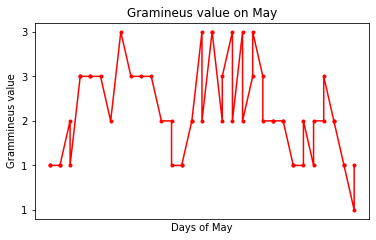

In [19]:
#Draw the figure for better understanding
malaga_may.plot(y='gra_value', use_index=True, color = 'r', marker = '.', legend=None)

plt.title('Gramineus value on May')

plt.xticks([])
plt.yticks([0, 1, 2, 3, 4], malaga_may['gra_value'])

plt.xlabel('Days of May')
plt.ylabel('Grammineus value')

### Map to visualize future locations of  gramineous risk

In [20]:
#Let's filter our dataframe on a new one that contains gra_value 4 (high accuary) and gra_ten A (potencially dangerous)
gra_filter = malaga_may[(malaga_may['gra_value'] > 2) & (malaga_may['gra_ten'] == 'A')]
gra_filter

,gra_value,gra_risk,gra_pre,gra_ten,LAT,LON
FECHA,,,,,,
2019-05-04,3,R,3,A,36.715445,-4.472933
2019-05-05,3,R,3,A,36.715445,-4.472933
2019-05-04,3,R,3,A,36.725731,-4.420821
2019-05-05,3,R,3,A,36.725731,-4.420821
2019-05-06,3,R,3,A,36.715445,-4.472933
2019-05-08,4,R,4,A,36.715445,-4.472933
2019-05-09,3,R,3,A,36.715445,-4.472933
2019-05-10,3,R,3,A,36.715445,-4.472933
2019-05-11,3,R,3,A,36.715445,-4.472933


##### As we see there're 17 cases of gramineous potencially dangerous and they're located in just two places

In [21]:
#Adding markers to map
for lat, lng, label in zip(malaga_data['LAT'], malaga_data['LON'], malaga_data['gra_ten']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_malaga)  

map_malaga

![title](https://i.imgur.com/NKMxSNA.png)

##### Now we know that we must alert before May and most trouble places is near Teatinos-Universidad and Center